In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Cross - correlation

# step = 1
def corr2d(X, K):
    h, w = K.shape
    y = torch.zeros(X.shape[0] - h + 1, X.shape[1] - w + 1)
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i, j] = (X[i:i+h, j:j+w] * K).sum()
    return y

In [12]:
a = torch.arange(0, 9, 1).view(3, 3)
k = torch.arange(0, 4, 1).view(2, 2)
c = corr2d(a, k)
c

tensor([[19., 25.],
        [37., 43.]])

Text(0.5, 1.0, 'edge')

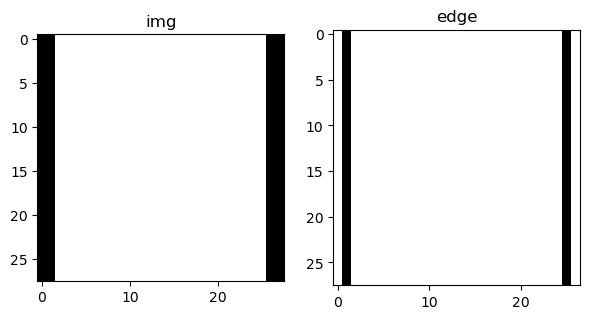

In [46]:
# Edge detection
img = torch.ones((28, 28))
img[:, 2:26] = 0
plt.subplots(1, 2, figsize=(7, 7))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray_r'); plt.title("img")

img2 = corr2d(img, torch.tensor([-1, 1]).view(1, -1))
plt.subplot(1, 2, 2); plt.imshow(torch.abs(img2), cmap='gray_r') ; plt.title("edge")

In [58]:
# Train 
torch.manual_seed(42)

Kernal = torch.randn((1, 2), dtype=torch.float, requires_grad=True)
Bias = torch.zeros((1, 1), dtype=torch.float, requires_grad=True)
parameters = [Kernal, Bias]
lr = 0.1

for i in range(1000):
    # forward pass
    img_hat = corr2d(img, Kernal) + Bias
    l = ((img_hat - img2)**2).mean()
    
    # backward pass
    for p in parameters:
        p.grad = None
    l.backward()
    for p in parameters:
        p.data += -lr * p.grad
    
    if i % 200 == 0:
        print(f'epoch {i:5d} loss: {l.item():10f}')
print(f'epoch {i+1:5d} loss: {l.item():10f}')

epoch     0 loss:   0.110337
epoch   200 loss:   0.004613
epoch   400 loss:   0.000236
epoch   600 loss:   0.000012
epoch   800 loss:   0.000001
epoch  1000 loss:   0.000000


In [59]:
print(Kernal)
print(Bias)

tensor([[-0.9993,  0.9993]], requires_grad=True)
tensor([[-1.9565e-14]], requires_grad=True)


In [76]:
# Multi-channel convolution
X = torch.tensor([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
                  [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
K = torch.tensor([[[0, 1], [2, 3]], [[1, 2], [3, 4]]])

def corr2d_multi_in(x, k):
    c, h, w = k.shape
    
    # step = 1
    out = torch.zeros(x.shape[1] - h + 1, x.shape[2] - w + 1)
    for i in range(c):
        out += corr2d(x[i], k[i])
    return out  

print(corr2d_multi_in(X, K))

tensor([[ 56.,  72.],
        [104., 120.]])


In [95]:
X = torch.tensor([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
                  [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
K = torch.tensor([[[0, 1], [2, 3]], [[1, 2], [3, 4]]])

def corr2d_multi_in_out(x, K):
    c_o, c_i, h, w = K.shape
    out = []
    for k in K:
        out.append(corr2d_multi_in(x, k))
    
    y = torch.stack(out)
    return y

K = torch.stack([K, K+1, K+2])
print(K.shape)
print(corr2d_multi_in_out(X, K))

torch.Size([3, 2, 2, 2])
tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])


In [99]:
a = nn.Conv2d(3, 5, 2)
for p in a.parameters():
    print(p.shape)

torch.Size([5, 3, 2, 2])
torch.Size([5])
